# Proyecto 6

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Descripción de datos

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)


## 1. Información General

In [28]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as m

In [29]:
#Cargar Dataset
df = pd.read_csv('..\data\games.csv')

In [30]:
#Descripción de datos
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [31]:
#Información de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [32]:
#Visualización de datos
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [33]:
df.duplicated().sum()

np.int64(0)

En esta primera parte, podemos observar que hay datos nulos en Name, Year_of_Release, Genre, Critic_Score,  User_Score y Rating, también podemos observar que se usan mayúsculas y minúsculas en los nombres de columnas y que el año de lanzamiento está como float cuando debería ser float, así como User_Score debería ser float. No hay duplicados

## 2. Preparar los datos

### Reemplazar nombres

In [34]:
df.columns = df.columns.str.lower() 

In [35]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Tipos de datos

In [36]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Datos ausentes

In [37]:
df['year_of_release'] = df['year_of_release'].astype(float)

In [38]:
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())

In [39]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [40]:
#df['user_score'] = df['user_score'].fillna(df['user_score'].median())

In [41]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,NaN,NaN


In [42]:
df['critic_score'] = df['critic_score'].astype(float)
df['user_score'] = df['user_score'].astype(float)

In [43]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [44]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,NaN,31.38


### Explicación

En primer lugar se cambiaron los tipos de datos de year_of_release, user_Score por float para poder maniúlar mejor los datos, también se buscaron los datos ausentes y fueron reeplazados en year_of_release por NaN, para que no afectara la manipulación de éstos, y en tanto en user_score como en critic_score fueron reemplazados la mediana para completar los valores nulos dado que estamos trabajando con distribuciones sesgadas, entonces de esta manera aseguramos que no afecten nuestros resultados.

## 3. Analiza los datos

### Juegos lanzados
Mira cuántos juegos fueron lanzados en diferentes años.

In [45]:
df['year_of_release'].head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64

<Axes: title={'center': 'Juegos lanzados por año'}, ylabel='Frequency'>

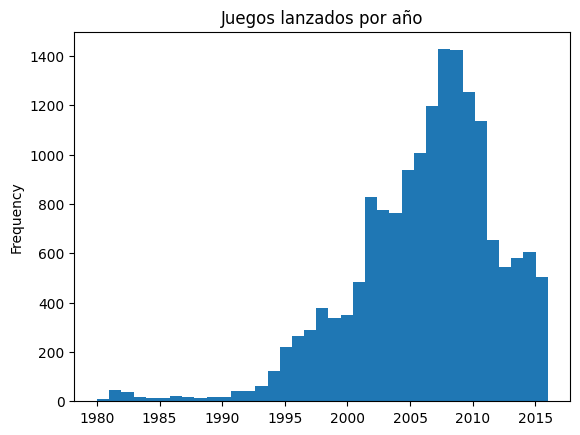

In [46]:
df['year_of_release'].plot(kind='hist', bins=37, x='año', y='Lanzamientos', title= 'Juegos lanzados por año')

¿Son significativos los datos de cada período?

Los datos sugieren que en el anio 2007 hubo el mayor numero de lanzamientos

### Variación de vantas
Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas.  ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

<function matplotlib.pyplot.show(close=None, block=None)>

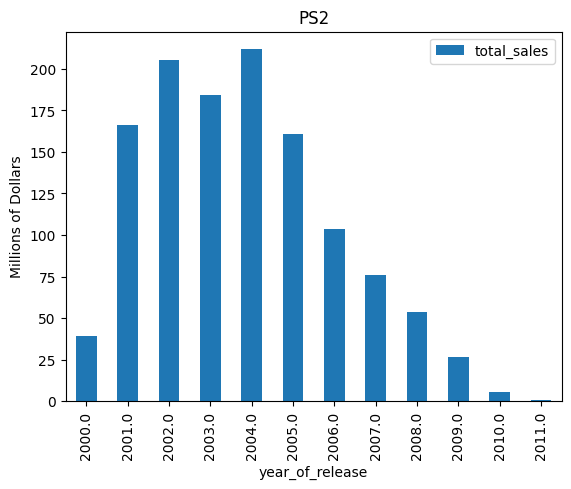

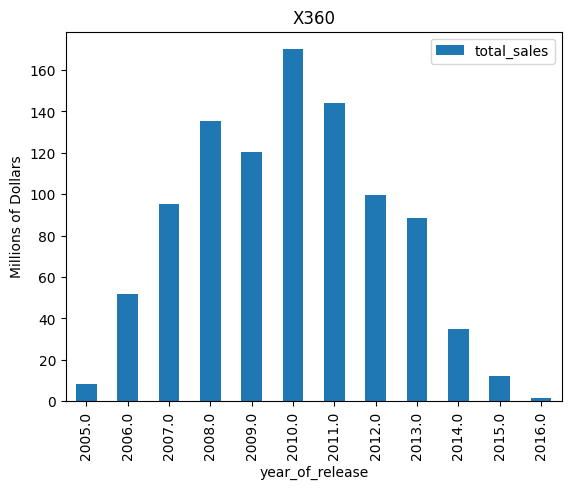

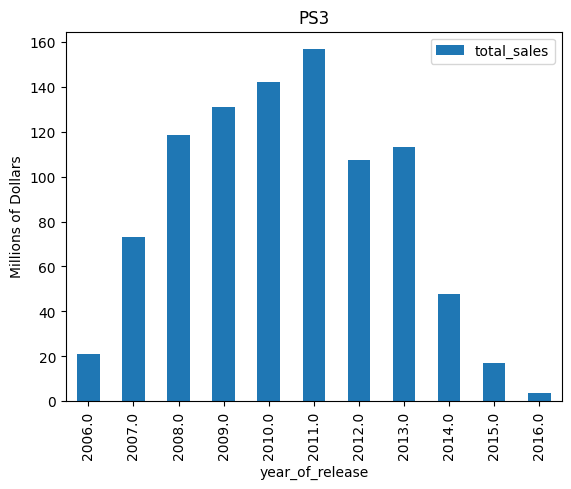

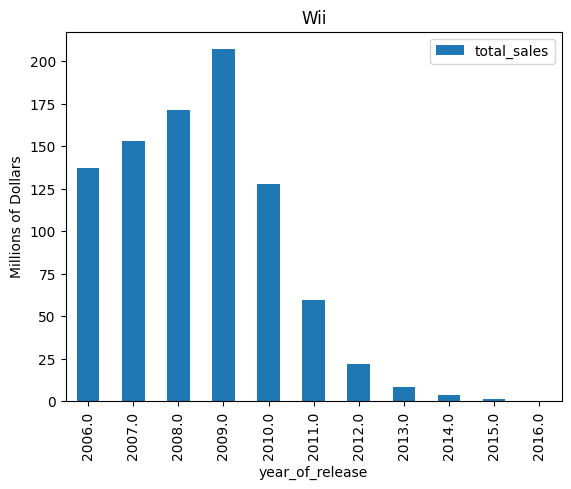

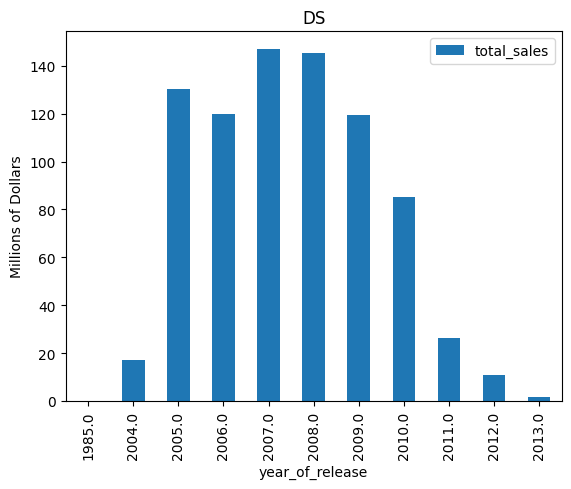

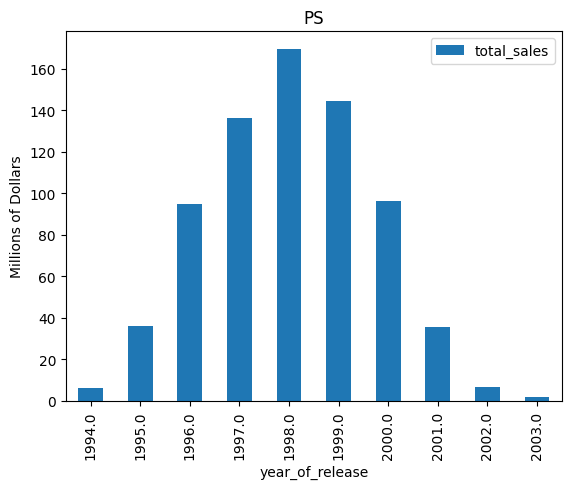

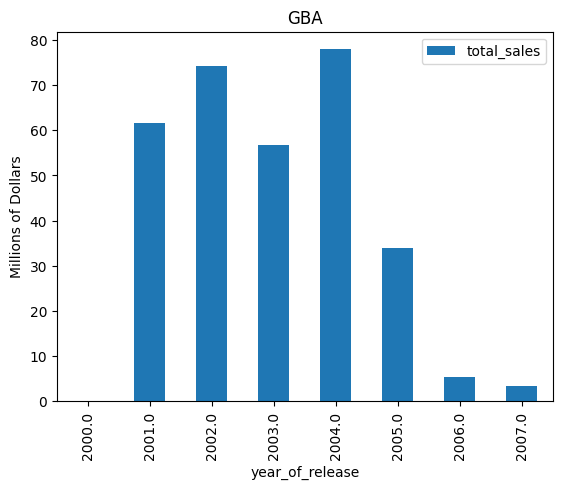

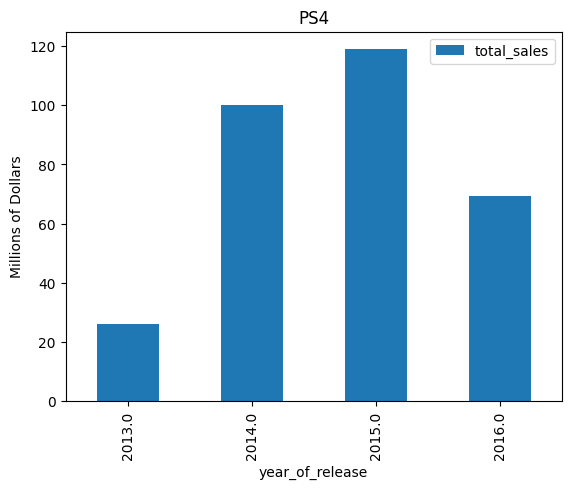

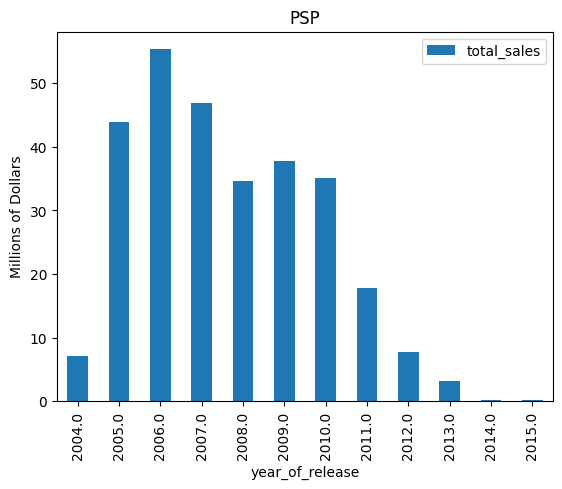

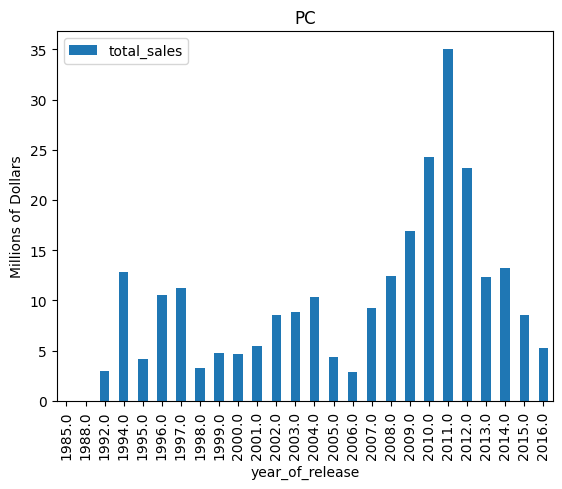

In [47]:
sales_by_platform = df[['platform', 'total_sales']].groupby('platform').sum().sort_values('total_sales', ascending=False).reset_index()
sales_by_platform['new_index'] = range(len(sales_by_platform))
#games_by_platform = games.merge(sales_by_platform, on=['platform'], how= 'outer').sort_values('new_index')
#display(sales_by_platform)

platforms = {}    
for platform in sales_by_platform['platform']:
    platforms[platform] = df[['year_of_release','total_sales']] [df['platform']==platform].groupby('year_of_release').sum()
    
for key, value in list(platforms.items())[:10]:
    value.plot(title=key, kind='bar', ylabel='Millions of Dollars')
plt.show

<Axes: xlabel='year_of_release'>

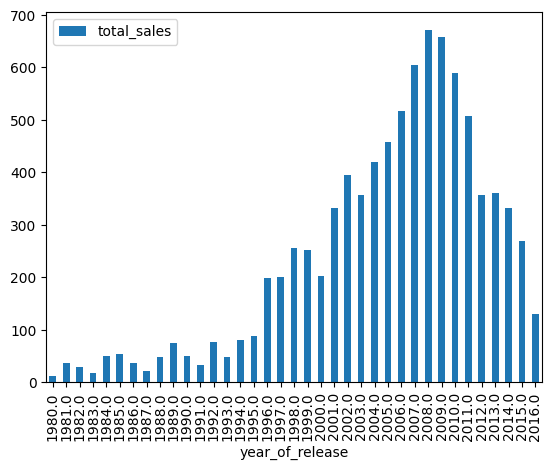

In [48]:
#games_by_sales = df[['year_of_release', 'total_sales']].groupby('total_sales').sum()
games_by_sales = df[['year_of_release', 'total_sales']].groupby('year_of_release').sum()
#display(games_by_sales)
games_by_sales.plot(kind='bar')

### Periodo
Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores. 
¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2011.0,63.20,156.78,NaN,143.84,NaN
2012.0,51.36,107.36,NaN,99.74,NaN
2013.0,56.57,113.25,25.99,88.58,18.96
2014.0,43.76,47.76,100.00,34.74,54.07
2015.0,27.78,16.82,118.90,11.96,60.14
2016.0,15.14,3.60,69.25,1.52,26.15


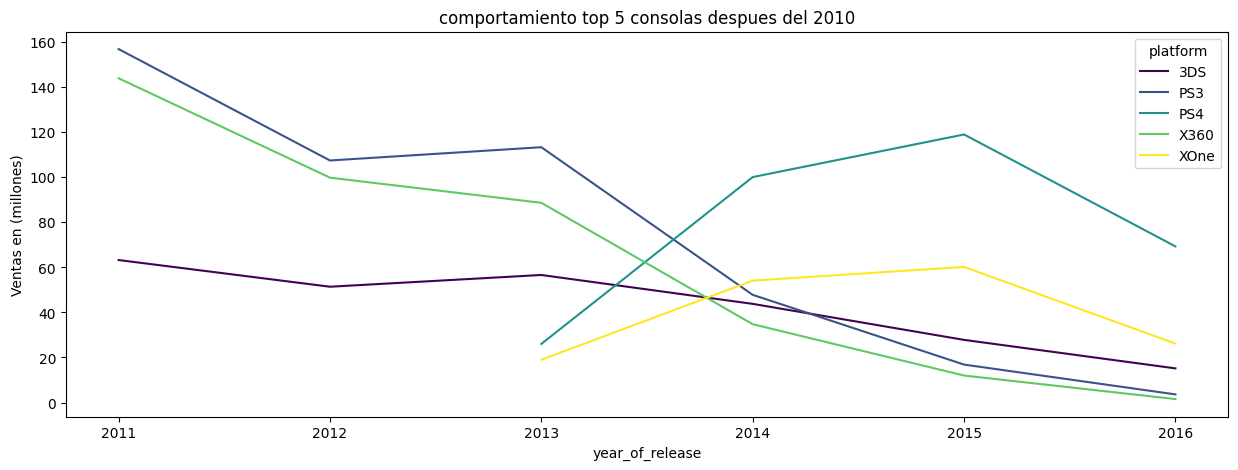

In [49]:
new_consoles = df[['platform','year_of_release','total_sales']].query("2010<year_of_release").groupby(['platform']).sum().sort_values(by='total_sales', ascending=False).reset_index().loc[:4]
new_consoles = df[df['platform'].isin(new_consoles['platform'])].groupby(['year_of_release','platform'])['total_sales'].sum().unstack()
new_consoles = new_consoles.query("2010<year_of_release")
new_consoles.plot(kind='line', title='comportamiento top 5 consolas despues del 2010', stacked=False, figsize=(15, 5), ylabel='Ventas en (millones)', colormap='viridis')
new_consoles

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

En esta seccion analizamos las 5 consolas con mas ventas a partir del 2010, despues utilizamos esas consololas en todos los datos que compartian en el dataset.

platform,DS,PS,PS2,Wii,X360
year_of_release,,,,,
1996.0,NaN,94.70,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN
2001.0,NaN,35.59,166.43,NaN,NaN
2002.0,NaN,6.67,205.38,NaN,NaN
2003.0,NaN,2.07,184.31,NaN,NaN
2004.0,17.27,NaN,211.81,NaN,NaN


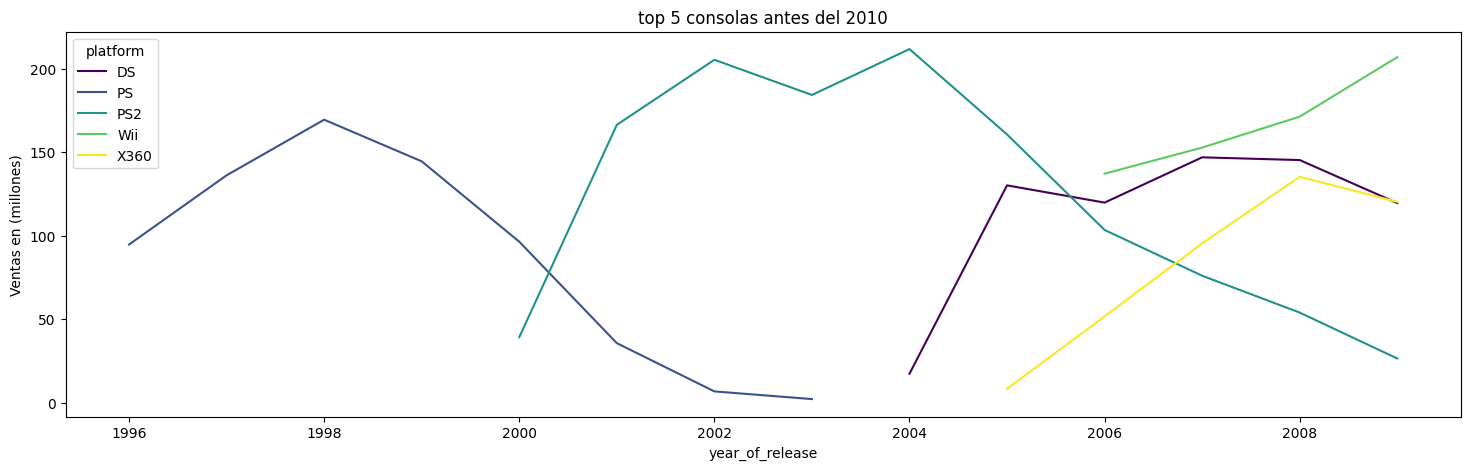

In [50]:
old_consoles = df[['platform','year_of_release','total_sales']].query("1995<year_of_release<2010").groupby(['platform']).sum().sort_values(by='total_sales', ascending=False).reset_index().loc[:4]
old_consoles = df[df['platform'].isin(old_consoles['platform'])].groupby(['year_of_release','platform'])['total_sales'].sum().unstack()
old_consoles = old_consoles.query("1995<year_of_release<2010")
#old_consoles = games[games['platform'].isin(old_consoles['platform'])].groupby(['year_of_release','platform'])['total_sales'].sum()
old_consoles.plot(kind='line', title='top 5 consolas antes del 2010', stacked=False, figsize=(18, 5), ylabel='Ventas en (millones)', colormap='viridis')
old_consoles

Aquí podemos decir que las ventas de las consoloas mas exitosas duran aproximadamente de 8 a 10 años

### Diagrama de caja
Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

<Axes: title={'center': 'year_of_release'}, xlabel='[platform]'>

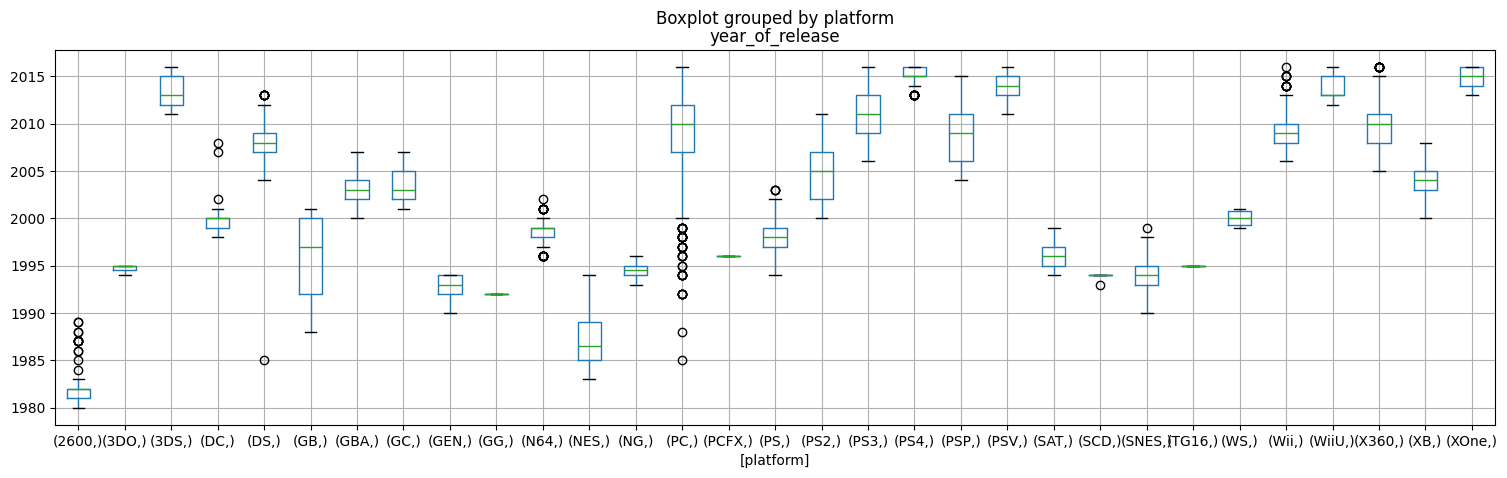

In [51]:
total_sales_by_platform = df[['year_of_release','platform','total_sales']]
total_sales_by_platform.boxplot(column='year_of_release', by=['platform'], figsize=(18,5))

¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

### Gráfico de dispersión
Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 

,critic_score,user_score,total_sales
14,61.0,6.3,21.82
23,97.0,8.1,16.27
29,88.0,3.4,14.73
32,87.0,6.3,14.62
35,83.0,4.8,13.68
36,94.0,6.3,13.47
44,94.0,7.8,12.12
51,98.0,7.9,11.00
60,73.0,2.6,10.24
64,91.0,7.9,9.86


,critic_score,user_score,total_sales
critic_score,1.000000,0.551214,0.360894
user_score,0.551214,1.000000,0.114459
total_sales,0.360894,0.114459,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

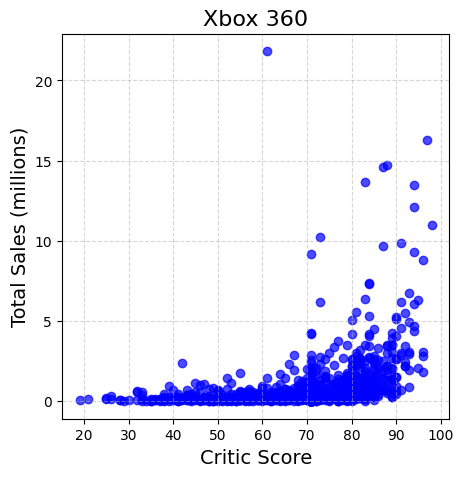

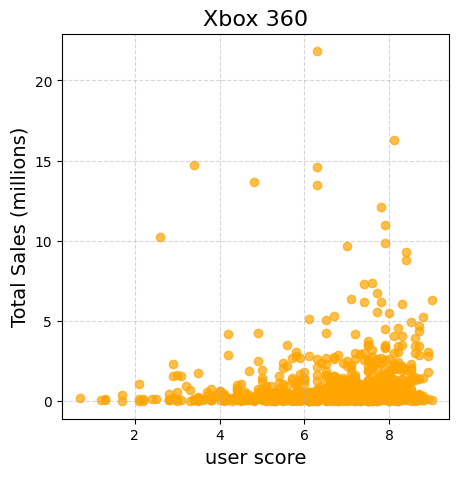

In [52]:
xbox360 = df.query("platform=='X360'").sort_values(by='total_sales',ascending=False)
xbox360 = xbox360[['critic_score','user_score','total_sales']]
display(xbox360.head(30))
#display(games.query("name=='Dance Dance Revolution'"))
xbox360_corr = xbox360.corr()
display(xbox360_corr)
plt.figure(figsize=(5,5))
plt.scatter(xbox360['critic_score'], xbox360['total_sales'], color='blue', alpha=0.7)
plt.title('Xbox 360', fontsize=16)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show

plt.figure(figsize=(5,5))
plt.scatter(xbox360['user_score'], xbox360['total_sales'], color='orange', alpha=0.7)
plt.title('Xbox 360', fontsize=16)
plt.xlabel('user score', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show

Conclusiones

Existe una ligera correlacion positiva entre el puntaje de los usuarios y las ventas totales casi de 0.4 y una correlacion casi nula entre el puntaje de los criticos y las ventas totales de (0.1) 

### Comparación
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

,critic_score,user_score,total_sales
85,86.0,7.6,8.01
138,93.0,7.3,6.29
192,88.0,4.0,5.14
195,71.0,NaN,5.11
218,93.0,8.2,4.83
273,71.0,NaN,4.20
284,96.0,9.1,4.12
288,91.0,7.9,4.09
313,94.0,8.1,3.88
330,79.0,8.0,3.76


,critic_score,user_score,total_sales
critic_score,1.000000,0.519563,0.220611
user_score,0.519563,1.000000,0.010476
total_sales,0.220611,0.010476,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

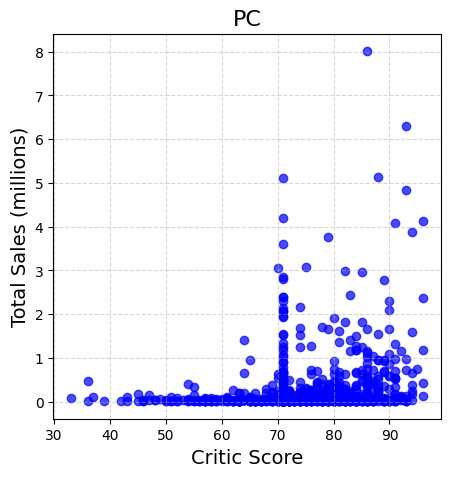

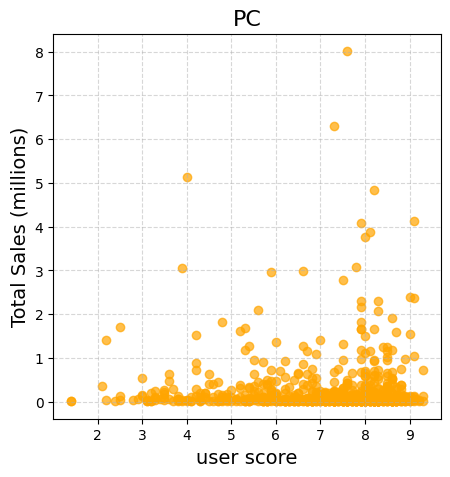

In [53]:
pc = df.query("platform=='PC'").sort_values(by='total_sales',ascending=False)
pc = pc[['critic_score','user_score','total_sales']]
display(pc.head(30))
#display(games.query("name=='Dance Dance Revolution'"))
pc_corr = pc.corr()
display(pc_corr)
plt.figure(figsize=(5,5))
plt.scatter(pc['critic_score'], pc['total_sales'], color='blue', alpha=0.7)
plt.title('PC', fontsize=16)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show

plt.figure(figsize=(5,5))
plt.scatter(pc['user_score'], pc['total_sales'], color='orange', alpha=0.7)
plt.title('PC', fontsize=16)
plt.xlabel('user score', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show

Conclusión:

En la plataforma PC se aprecia una correlacion menor aun que en la de xbox360 tanto en la correlacion de puntajes de usuarios contra las ventas totales (0.01) como en la correlacion de puntaje de criticos contra ventas totales (0.25)

### Género
Echa un vistazo a la distribución general de los juegos por género. 

,total_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


<Axes: xlabel='genre'>

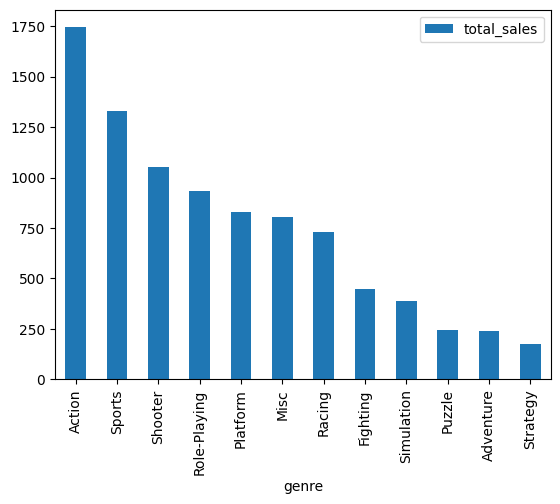

In [54]:
df_genre = df.groupby('genre')
df_genre = df_genre[['total_sales']].sum().sort_values(by='total_sales', ascending=False)
display(df_genre)
df_genre.plot(kind='bar')

¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Podemos observar que los géneros máas vendidos son: Action, Sports y Shooter, seguido de Role Playing que es muy consumido en Japón

## 4. Perfil de usuario por región

### Las 5 plataformas principales

<Axes: xlabel='platform'>

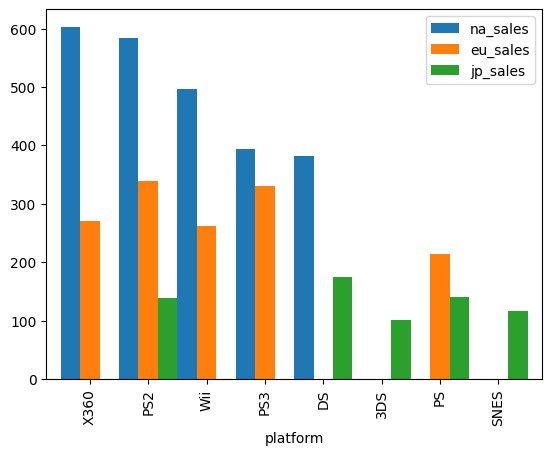

In [55]:
df_na = df[['platform','na_sales']].groupby('platform').sum().sort_values(by='na_sales',ascending=False).iloc[:5]
df_eu = df[['platform','eu_sales']].groupby('platform').sum().sort_values(by='eu_sales',ascending=False).iloc[:5]
df_jp = df[['platform','jp_sales']].groupby('platform').sum().sort_values(by='jp_sales',ascending=False).iloc[:5]
#display(df_na,df_eu,df_jp)
df_sales = df_na.merge(df_eu, how='outer', on='platform').merge(df_jp, how='outer', on='platform').sort_values(by='na_sales', ascending=False)
df_sales.plot(kind='bar', width=1)

Describe las variaciones en sus cuotas de mercado de una región a otra.

Las ventas en Norteamerica superan las ventas en Europa por casi el doble y en Japón por casi el tripe. En Norteamerica la única consola portátil es el DS mientas que en Japón aparecen 2 consolas portátiles dentro las primeras 5 

En el top 5 de Europa solo tenemos consolas fijas

hasta el año 2016, esas fueron las 8 principales consolas en las diferentes regiones

### Los cinco géneros principales

<Axes: xlabel='genre'>

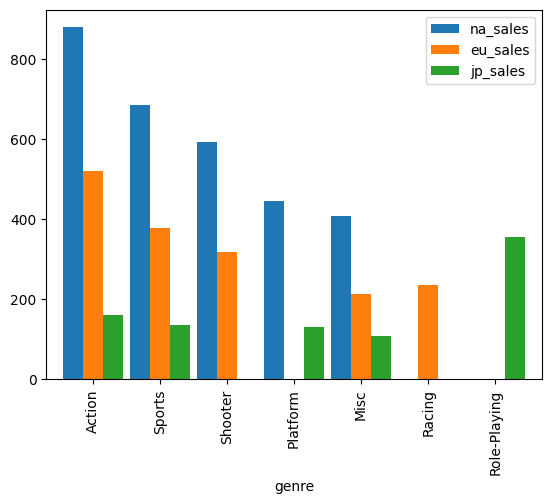

In [56]:
genre_na = df[['genre','na_sales']].groupby('genre').sum().sort_values(by='na_sales',ascending=False).iloc[:5]
genre_eu = df[['genre','eu_sales']].groupby('genre').sum().sort_values(by='eu_sales',ascending=False).iloc[:5]
genre_jp = df[['genre','jp_sales']].groupby('genre').sum().sort_values(by='jp_sales',ascending=False).iloc[:5]

genre_df = genre_na.merge(genre_eu, how='outer', on='genre').merge(genre_jp, how='outer', on='genre').sort_values(by='na_sales', ascending=False)
genre_df.plot(kind='bar', width=0.9)

Explica la diferencia.

En Norteamérica es en donde más consumen Action, Sports, Shooter, Platform y Misc, dejando de lado Racing que solo lo consumen en Europa o Role- Playing que solo lo consumen en Japón. Action, Sports Y Misc, son los géneros que coinciden con las tres regiones.

### ESRB

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

,na_sales,eu_sales,jp_sales
rating_read,,,
Everyone,1295.55,710.52,199.57
Pending,1242.46,613.91,841.96
Teens,759.75,427.03,151.40
Mature,748.48,483.97,64.24
Everyone 10y+,353.32,188.52,40.20
Early Childhood,1.53,0.11,0.00
Adults Only,1.26,0.61,0.00


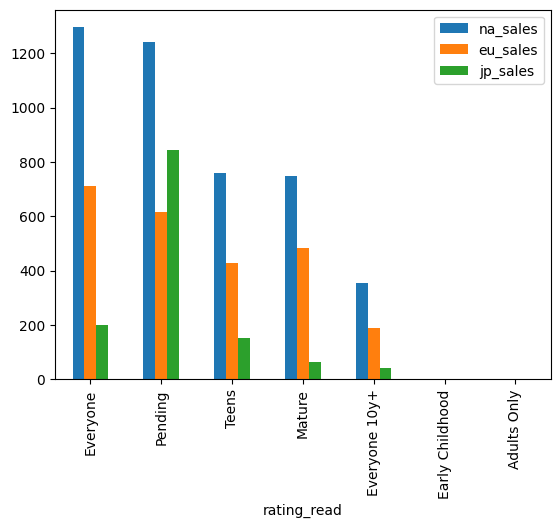

In [57]:
def ESRB (rating):
    if rating == "E" or rating == "K-A":
        return "Everyone"
    elif rating == "T":
        return "Teens"
    elif rating == "M":
        return "Mature"
    elif rating == "E10+":
        return "Everyone 10y+"
    elif rating == "EC":
        return "Early Childhood"
    elif rating == "RP":
        return "Pending"
    elif rating == "AO":
        return "Adults Only"
    else:
        return "Pending"
df['rating_read'] =  df['rating'].apply(ESRB)
rating_df = df.groupby('rating_read')[['na_sales','eu_sales','jp_sales']].sum().sort_values(by='na_sales', ascending=False)
rating_df.plot(kind='bar')
display(rating_df)

Se puede apreciar una clara diferencia en ventas en cuanto a la clasificacion de cada género. Everyone predomina en Norteamerica y Europa mientras que Early Childhood y Adults Only practicamente no tienen ventas en ninguna region.

## 5. Hipótesis

### Hipótesis 1

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Los usuarios otorgan un puntaje promedio para el xBox one de 6.52
Los usuarios otorgan un puntaje promedio para la PC de 7.06 puntos.
Las varianzas son significativamente similiares, el valor p de la prueba de levene es: 0.07549452472407711
El valor p para la prueba t es de:  1.3896435533548819e-05
Rechazamos hipotesis nula


<Axes: >

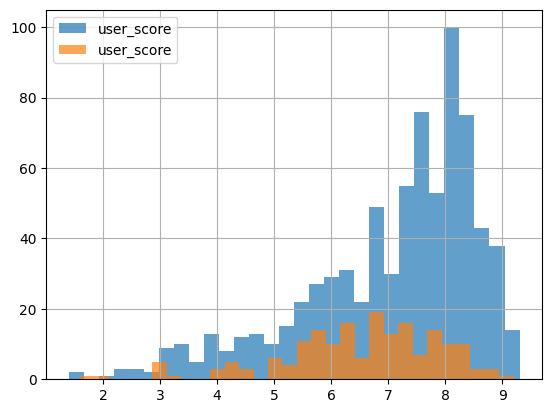

In [58]:
xone = df[df['platform'] == 'XOne']['user_score'].dropna()
xone_mean = xone.mean()

print(f'Los usuarios otorgan un puntaje promedio para el xBox one de {xone_mean:.2f}')

pc = df[df['platform'] == 'PC']['user_score'].dropna()
pc_mean = pc.mean()
print(f'Los usuarios otorgan un puntaje promedio para la PC de {pc_mean:.2f} puntos.')

levene_result = st.levene(pc, xone, center='mean')
if levene_result.pvalue > 0.05:
    print(f'Las varianzas son significativamente similiares, el valor p de la prueba de levene es: {levene_result.pvalue}')

alpha = 0.05
result = st.ttest_ind(xone, pc, equal_var=True) # Realizamos la prueba ttest para independientes

print('El valor p para la prueba t es de: ', result.pvalue)
if result.pvalue < alpha:
    print('Rechazamos hipotesis nula')
else:
    print('No podemos rechazar la Hipotesis Nula')
    
pc.hist(bins=30, alpha=0.7, legend='PC')
xone.hist(bins=30, alpha=0.7, legend='xBox one')


### Hipótesis 2

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Los usuarios otorgan un puntaje promedio para la clasificacion action de 7.05
Los usuarios otorgan un puntaje promedio para la clasificacion sports de 6.96 puntos.
Las varianzas son significativamente distintas. El valor p de la prueba de levene es:  5.355232768512743e-06
El valor P de la prueba T para varianzas distintas es:  0.11483818791498286
No podemos rechazar la Hipotesis Nula, las calificaciones para los generos accion y deportes siguen una distribucion y media similares


<Axes: >

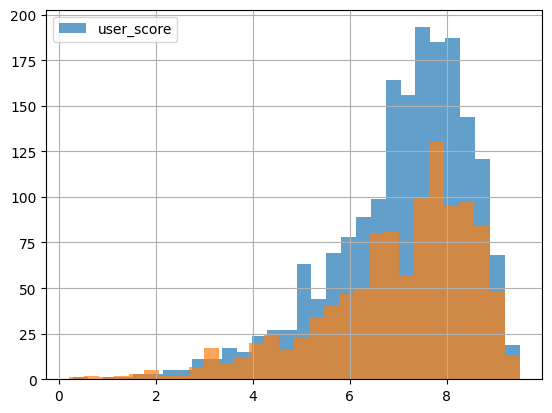

In [59]:
#df['user_score'] = 10*df['user_score']
action = df[df['genre'] == 'Action']['user_score'].dropna()
action_mean = action.mean()
print(f'Los usuarios otorgan un puntaje promedio para la clasificacion action de {action_mean:.2f}')

sports = df[df['genre'] == 'Sports']['user_score'].dropna()
sports_mean = sports.mean()
print(f'Los usuarios otorgan un puntaje promedio para la clasificacion sports de {sports_mean:.2f} puntos.')

levene_result2 = st.levene(action, sports, center='mean')
if levene_result2.pvalue > 0.05:
    print(f'Las varianzas son significativamente similiares, el valor p de la prueba de levene es: {levene_result2.pvalue}')
else:
    print('Las varianzas son significativamente distintas. El valor p de la prueba de levene es: ', levene_result2.pvalue)


alpha = 0.05
result2 = st.ttest_ind(action, sports, equal_var=False) # Realizamos la prueba ttest para independientes

print('El valor P de la prueba T para varianzas distintas es: ', result2.pvalue)
if result2.pvalue < alpha:
    print('Rechazamos hipotesis nula')
else:
    print('No podemos rechazar la Hipotesis Nula, las calificaciones para los generos accion y deportes siguen una distribucion y media similares')
    
action.hist(bins=30, alpha=0.7, legend=True)
sports.hist(bins=30, alpha=0.7)

Explica:
Cómo formulaste las hipótesis nula y alternativa.
Qué criterio utilizaste para probar las hipótesis y por qué.

Realizamos la prueba st.ttest_ind para independientes y una prueba de Levene para mostrar si las varianzas son iguales y agregarlo dentro de la función. Como equal_var=True. Para esto, primero calculamos las varianzas para cada una de las plataformas y en un segundo tiempo se aplicó la función: levene(xone, pc)
    
Adoptamos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 


## 6. Conclusión General

Al procesar los datos, evitamos la sustitución de valores innecesarios para preservar la integridad estadística de las columnas relacionadas con ventas y puntuaciones. Los valores faltantes estaban correctamente representados por NaN, por lo que no fue necesario modificar su distribución. Sin embargo, los datos categorizados como "tbd" sí requirieron ser transformados a NaN, ya que no era posible asignarles una calificación sin afectar la validez de nuestras pruebas.
En cuanto al lanzamiento de videojuegos por año, se observa un pico significativo alrededor de 2008, seguido de una disminución en la cantidad de nuevos títulos publicados. Sería interesante analizar la evolución de esta tendencia después de 2016 para obtener una perspectiva más actualizada.
Las gráficas de ventas totales muestran que, a lo largo de 30 años, las consolas con mayores volúmenes de ventas fueron PlayStation 2, Xbox 360 y PlayStation 3. Además, el periodo con el mayor número de ventas coincide con la época en la que se lanzaron más títulos, aproximadamente en 2008.
Para un análisis más detallado, se aislaron los últimos seis años (2011-2016), ya que en este periodo se puede apreciar mejor el comportamiento de las consolas más exitosas en los años solicitados. Previo a este intervalo, examinamos un lapso de 24 años para observar el desempeño histórico de las mejores plataformas.
El boxplot evidencia que la única plataforma que se ha mantenido constante en la publicación de títulos es PC, diferenciándose del resto de las consolas.
Las reseñas, en general, no parecen tener una relación directa con las ventas, lo que sugiere que existen otros factores determinantes en la comercialización de los juegos, más allá de las puntuaciones obtenidas.
A nivel global, los géneros más jugados son Acción, Deportes y FPS. Sin embargo, los juegos de rol presentan un consumo considerable, impulsado principalmente por la demanda en Japón.
Al comparar las ventas totales, observamos tendencias similares a nivel mundial, aunque con variaciones por región que pueden estar influenciadas por la cantidad total de jugadores o la población absoluta.
Respecto al género Early Childhood, sería ideal que su presencia se mantuviera estable, ya que el consumo de videojuegos a edades muy tempranas no parece recomendable. Por otro lado, no hay una presencia significativa de títulos catalogados como Adults Only.
Las pruebas estadísticas entre Xbox y PC reflejan que la distribución de datos es diferente, y que la coincidencia en sus medias aproximadas es circunstancial.
Finalmente, el análisis de la distribución de puntuaciones en los géneros de Acción y Deportes revela una tendencia sesgada a la derecha, lo que indica que ambas categorías reciben generalmente calificaciones altas
